In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
%matplotlib inline

df = pd.read_csv('coffee_dataset.csv')

In [2]:
# Lets simulate our sample which would be what actually have since in most 
# cases we don't have information about the whole population but just a sample
# from the population and we try to understand the population from the sample 
# data we have.
sample_df = df.sample(200)
sample_df.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


# Goal 1
Find out if the average height of all coffee drinkers greater than **70 inches**?

## Null and Alternate Hypothesis setup
$$
H_0: \mu \leq 70 \\
H_1: \mu > 70
$$

## We bootstap our sampling distribution

In [3]:
mean_sd = []
for _ in range(10000):
    bt_sample = sample_df.sample(200, replace=True)
    mean_sd.append(bt_sample.height.mean())

## We find the 95% Confidence Interval

In [4]:
upper, lower = np.percentile(mean_sd, 2.5), np.percentile(mean_sd, 97.5)
upper, lower

(67.13175946597063, 68.00582642090184)

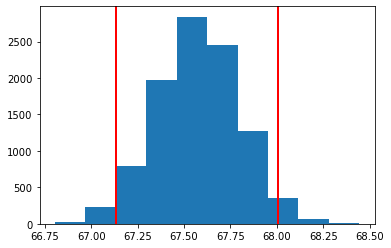

In [5]:
plt.hist(mean_sd)
plt.axvline(x=lower, color='r', linewidth=2)
plt.axvline(x=upper, color='r', linewidth=2);

## Interpretation
Using your confidence interval, you can simply look at if the interval falls in the null hypothesis space or in the alternative hypothesis space to choose which hypothesis you believe to be true.

In the above case, our interval was entirely below 70, which would suggest the null (the population mean is less than 70) is actually true.



# Goal 2
Find out if the average height of all coffee drinkers greater than **67.5 inches**?

## Null and Alternate Hypothesis setup
$$
H_0: \mu \leq 67.5 \\
H_1: \mu > 67.5
$$

> Making use of our bootstrapped sampling distribution of sample means `mean_sd` and our gotten bounds for confidence intervals `lower` and `upper`, our distribution would  be the same as above...

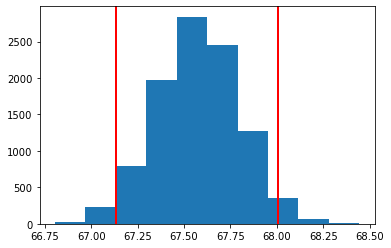

In [6]:
plt.hist(mean_sd)
plt.axvline(x=lower, color='r', linewidth=2)
plt.axvline(x=upper, color='r', linewidth=2);

## Interpretation
* How should we interprete for our **Goal 2**?
* Do we accept or fail to accept null?